C:\Users\sergi\Desktop\LeadNeurotoxicityModelling\comp_model_v0.py:350: RuntimeWarning: invalid value encountered in scalar multiply
  dy[52] = alpha_m(y[51])*(1.0 - y[52]) - beta_m(y[51])*y[52]
C:\Users\sergi\Desktop\LeadNeurotoxicityModelling\comp_model_v0.py:351: RuntimeWarning: invalid value encountered in scalar multiply
  dy[53] = alpha_h(y[51])*(1.0 - y[53]) - beta_h(y[51])*y[53]
C:\Users\sergi\Desktop\LeadNeurotoxicityModelling\comp_model_v0.py:352: RuntimeWarning: invalid value encountered in scalar multiply
  dy[54] = alpha_n(y[51])*(1.0 - y[54]) - beta_n(y[51])*y[54]
C:\Users\sergi\Desktop\LeadNeurotoxicityModelling\comp_model_v0.py:357: RuntimeWarning: overflow encountered in multiply
  dy[51:] = dy[51:]*3600000 #(h-1)


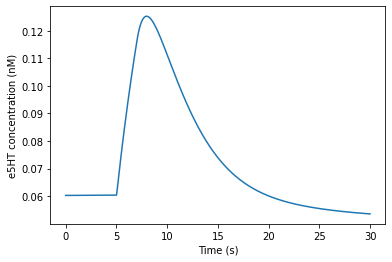

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sergi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-427b541399cb>", line 103, in <module>
    plt.plot(time_array*3600, [fireht(sol.y[-1,:], 1) for i in time_array])
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\pyplot.py", line 3019, in plot
    return gca().plot(
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_axes.py", line 1607, in plot
    self.add_line(line)
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_base.py", line 2101, in add_line
    self._update_line_limits(line)
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_base.py", line 2123, in _update_line_limits
    path = line.get_path()
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sergi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-427b541399cb>", line 103, in <module>
    plt.plot(time_array*3600, [fireht(sol.y[-1,:], 1) for i in time_array])
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\pyplot.py", line 3019, in plot
    return gca().plot(
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_axes.py", line 1607, in plot
    self.add_line(line)
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_base.py", line 2101, in add_line
    self._update_line_limits(line)
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_base.py", line 2123, in _update_line_limits
    path = line.get_path()
  File "C:\Users\sergi\AppData\Roaming\Python\Python38\site-packages\matplotlib

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math 
from comp_model_v0 import *


#the equations model the differential terms of this model, calculate how much these variables are going to change in each iterations
#find the ks that give the diff eq to 0

#Time array.
t_factor = 3600*1000 #Time factor for graphs.
time = 30*1000/t_factor # Time of simulation depending on t_factor.
sampling_rate = 1*t_factor #number of samples per time factor units.
time_array = np.linspace(0, time, math.floor(time * sampling_rate + 1))

## Compartmental models parameters.
weight = 20                          # Mouse weight in g
volume_factor = 5                   # ml/kg of body weight.
volume_injection = volume_factor*(weight/1000)                         # in ml.
IP_volume = 2 # in ml.
plasma_volume = 2 # in ml.
brain_volume = 0.41 # in ml.
peripheral_volume = 25 # in ml.

# Volumes in mL.
v0 = IP_volume+volume_injection
v1 = plasma_volume
v2 = brain_volume
v3 = peripheral_volume

#Dose parameters for escitalopram. 
SSRI_dose_factor = 0                     # mg/kg of body weight. 
SSRI_start_time = 0*3600/t_factor           # Starting time of SSRI dose in same units as t_factor.
SSRI_dose = (SSRI_dose_factor*1e6)*(weight/1000) * 0.001 # In ug. 
SSRI_repeat_time = 8*3600/t_factor #Time for repeat of dose. 
SSRI_bioavailability = 0.8

#Molecular weight of escitalopram.
ssri_molecular_weight = 324.392 # g/mol, or ug/umol.


#Dose parameters for FMH. 
FMH_dose_factor = 0 #mg/kg of body weight.
FMH_start_time = 1*3600/t_factor           # Starting time of SSRI dose in same units as t_factor.
FMH_dose = (FMH_dose_factor*1e6)*(weight/1000) * 0.001 # In ug.
FMH_repeat_time = 3600/t_factor # Time for repeat of dose. 
FMH_bioavailability = 0.95

#Molecular weight of FMH.
fmh_molecular_weight = 187.17 # g/mol, or ug/umol.

## Mast cell model of neuroinflammation. 
mc_start_time = 0.5*3600/t_factor #Time to start neuroinflammation effects with mast cells.
mc_switch = 0 #Switch that turns on an off all effects of mast cell presence.

## Basal parameters. 
btrp0 = 96 #Blood tryptophan equilibrium value. 
eht_basal = 0.06 #Steady state basal concentration of serotonin.
gstar_5ht_basal = 0.8561 #Equilibrium concentration of g* serotonin.
gstar_ha_basal =  0.7484 #Equilibrium concentration of g* histamine. 
bht0 = 100 # Blood histidine equilibrium value. 
vht_basal = 63.0457 #Equilibrium vesicular 5ht. 
vha_basal = 136.3639 #Equilibrium vesicular ha.


##HH Model parameters.

#Constant parameters
random_seed = 25 #Seed of the pseudo-random number generator. 
np.random.seed(random_seed)


#Initial conditions with their original shapes. 
Vm = -60 #Membrane potential. 
m = 0.05  #Activation gating variable for the voltage-gated sodium (Na+) channels.
h = 0.6  #Activation gating variable for the voltage-gated potassium (K+) channels.
n = 0.32  #Inactivation gating variable for the Na+ channels.
Ca_0 = 0 #Internal calcium. 
activity = 0 #Activity of neuron. 


#Initial conditions
y0 = [95.9766, 0.0994, 0.9006, 20.1618, 1.6094, 0.0373, 63.0383, 280.0048, 
      0.0603, 1.6824, 113.4099, 0.8660, 1.0112, 0.9791, 0.0027, 0.7114, 1.3245, 
      0.9874, 0.2666, 1.0203, 0.2297, 0, 0, 0, 0, 0, 3.1074, 136.3639, 241.9217, 
      1.4378, 2.0126, 99.7316, 249.3265, 311.6581, 0.7114, 1.3245, 0.9874, 0.8660, 
      1.0112, 0.9791, 354.6656, 177.3328,	350,	150,	3,	140, 0, 0, 0, 0, 1, Vm, m, h, n, Ca_0, activity]

arguments = (v2, ssri_molecular_weight, SSRI_start_time, SSRI_repeat_time, SSRI_dose*SSRI_bioavailability, fmh_molecular_weight, FMH_start_time, FMH_repeat_time, FMH_dose*FMH_bioavailability,  mc_switch, mc_start_time, btrp0, eht_basal, gstar_5ht_basal, gstar_ha_basal, bht0, vht_basal, vha_basal)
 
#Get solution of the system differential equation.
sol = solve_ivp(comp_model, t_span = (time_array[0], time_array[-1]), t_eval = time_array, y0 = y0, method = 'DOP853', args = arguments)


plt.figure()
plt.plot(time_array*3600, sol.y[8, :])
plt.xlabel('Time (s)')
plt.ylabel('e5HT concentration (nM)')
plt.show()

plt.figure()
plt.plot(time_array*3600, [fireht(sol.y[-1,:], 1) for i in time_array])
plt.xlabel('Time (s)')
plt.ylabel('Fire')
plt.show()

In [ ]:
plt.figure()
plt.plot(time_array*3600, sol.y[-1, :])
plt.xlabel('Time (s)')
plt.ylabel('e5HT concentration (nM)')
plt.show()